# 離散畳み込み(Discrete Convolution)

$\newcommand{\im}{\mathrm{i}}$

## 離散フーリエ変換(DFT)
離散畳み込みを理解するための、第一歩として、離散フーリエ変換を説明する。

**定義**　$b = (b_0, \dots , b_{2M-2}) \in \mathbb{C}^{2M-1} $ に対して、$a = \mathcal{F}(b) \in \mathbb{C}^{2M-1}$ を

$$
a_k = \mathcal{F}(b) := \sum_{j=0}^{2M-2} b_j e^{-2\pi \im (\frac{jk}{2M-1}) },\quad |k|<M
$$

とし、これを**離散フーリエ変換(DFT)**と呼ぶ。

## 逆離散フーリエ変換(IDFT)
**定義**　$a = (a_k)_{|k| < M} = (a_{-M+1}, \dots , a_{M-1}) \in \mathbb{C}^{2M-1}$ に対して、$b = \mathcal{F}^{-1} (a) \in \mathbb{C}^{2M-1}$を

$$
b_j = \mathcal{F}^{-1} (a) := \sum_{k = -M+1}^{M-1} a_k e^{2 \pi \im (\frac{jk}{2M-1})} \quad j=0, \dots , 2M-2
$$

とし、**逆離散フーリエ変換(IDFT)**と呼ぶ。

**注意**　一般的なDFT/IDFTはスケーリング係数をつけた形で定義されることが多い。この点で上の定義は一般的な定義と違う。

## 離散畳み込みのアルゴリズム

$u_1, u_2$を周期 $L$ 、変数 $t$ に関する周期関数とし、$\omega = \frac{2\pi}{L}$とする。このとき、$u_1, u_2$をフーリエ級数展開すると、

$$
    u_1(t) = \sum_{k \in \mathbb{Z}} a_{k}^{(1)} e^{\im k\omega t} , \quad a^{(1)} = (a_{k}^{(1)})_{k \in \mathbb{Z}} \\
    u_2(t) = \sum_{k \in \mathbb{Z}} a_{k}^{(2)} e^{\im k\omega t} , \quad a^{(2)} = (a_{k}^{(2)})_{k \in \mathbb{Z}}.
$$

そして、これらの周期関数の積は、

$$
    u_1(t)u_2(t) = \sum_{k \in \mathbb{Z}} (a^{(1)}*a^{(2)})_{k}  e^{\im k\omega t}
$$

と表される。ここで $ (a^{(1)}*a^{(2)})_k$ を**離散畳み込み**といい、

$$
     (a^{(1)}*a^{(2)})_k = \sum_{k_1 + k_2 = k \\ k_1 , k_2 \in \mathbb{Z}} a_{k_1}^{(1)} a_{k_2}^{(2)} , \quad k \in \mathbb{Z}
$$

と表される。


さらに、数値計算への応用を意識すると、$u_1, u_2$ のような（有限モードのフーリエ級数で表される）周期関数が $p$ 個($p \in \mathbb{N}$)あったとき、

$$
    u_i(t) = \sum_{|k| < M} a_{k}^{(i)} e^{\im k\omega t} , \quad a^{(i)} = (a_{k}^{(i)})_{|k| < M} \quad
    i = 1 , \cdots ,p \quad M \in \mathbb{Z}.
$$

離散畳み込みはこれらの周期関数の積

$$
    u_1(t)\cdots u_p(t) = \sum_{|k| \leq p(M-1)}(a^{(1)}* \cdots *a^{(p)})_k e^{\im k\omega t}
$$

を表す事になる。ここで

$$
    (a^{(1)}* \cdots *a^{(p)})_k = \sum_{k_1 + \cdots + k_p = k,\\ |k| \leq p(M-1), \\ |k_1| , \cdots ,|k_p|<M} a_{k_1}^{(1)} \cdots  a_{k_p}^{(p)}
$$

と表される。


### 畳み込みの定理
畳み込みを離散フーリエ変換したものは、それぞれのフーリエ係数の離散フーリエ変換の積になる。

$$
\begin{aligned}
    \mathcal{F}(a^{(1)}* \cdots *a^{(p)}) &= \mathcal{F}(a^{(1)})\hat{\ast} \cdots \hat{\ast}\mathcal{F}(a^{(p)}) \\
    &= b^{(1)}\hat{\ast}\cdots \hat{\ast}b^{(p)}
\end{aligned}
$$

ここで $ b^{(1)}\hat{\ast} \cdots \hat{\ast}b^{(p)}$ におけるベクトル同士の積は、要素毎の積を表す。

### 離散フーリエ変換を使った畳み込みの計算方法(FFTアルゴリズム) 

実際の畳み込みの計算方法について説明する。

周期$L$、変数$t$の周期関数 $u_i(t)$ が有限項のフーリエ級数

$$
    u_i(t) = \sum_{|k|<M} a_{k}^{(i)} e^{\im k\omega t} , \quad a^{(i)} = (a_{k}^{(i)})_{|k|<M} 
$$

で表されているとする。ここで $\omega = \frac{2 \pi}{L}$ とする。このとき、$p$ 個の関数の積

$$
    u_1(t)\cdots u_p(t) = \sum_{|k| \leq p(M-1)}c_k e^{\im k\omega t}
$$

を表現するフーリエ係数 $(c_k)_{|k| \leq p(M-1)}$ を以下の計算方法により求める。

---

**入力**: $a^{(i)} = (a^{(i)}_k)_{|k|<M}\in\mathbb{C}^{2M-1} \quad (i = 1, \cdots , p)$

**step1**: エイリアシングエラーを防ぐために、入力された値 $a^{(i)}$ の両脇に $(p-1)M$ 個の $0$ を付け加える。これを $\tilde{a}^{(i)}$ と書く。

$$
    \tilde{a}^{(i)} = (\underbrace{0, \cdots , 0}_{(p-1)M\text{個}}, \underbrace{a^{(i)}_{-M+1}, \cdots , a^{(i)}_{M-1}}_{2M-1\text{個}},\underbrace{0, \cdots , 0}_{(p-1)M\text{個}}) \in \mathbb{C}^{2pM-1}
$$

**step2**: step1で得た値 $\tilde{a}^{(i)}$ に対して逆離散フーリエ変換を行う。変換した後の値を $\tilde{b}^{(i)}$ と置く。

$$
    \tilde{b}^{(i)} = \mathcal{F}^{-1}(\tilde{a}^{(i)}) \in \mathbb{C}^{2pM-1}
$$

**step3**: $ (\tilde{b}^{(1)} \hat{*} \cdots \hat{*} \tilde{b}^{(p)}) $を計算する。上記の畳み込みの定理と同じく、このベクトル同士の積は、要素毎の積を表す。

$$
    (\tilde{b}^{(1)} \hat{*} \cdots \hat{*} \tilde{b}^{(p)} )_{j} = \tilde{b}^{(1)}_j \cdots \tilde{b}^{(p)}_j , \quad j = 0, \cdots , 2pM-2
$$

**step4**: step3で求めた$ (\tilde{b}^{(1)} \hat{*} \cdots \hat{*} \tilde{b}^{(p)}) $に対して、離散フーリエ変換を行い、得た値を $2pM-1$ で割る。

$$
     c_k = \frac{1}{2pM-1} \mathcal{F}_k (\tilde{b}^{(i)} \tilde{*} \cdots \tilde{*} \tilde{b}^{(p)}) \quad |k| \leq p(M-1)
$$

求めた $c_k$ のうち、実際に必要なのは両脇の $p-1$ 個を取り除いた $|k| \leq p(M-1)$ 個である。

---

### 具体例
適当に周期関数を決めて、離散畳み込みを行ってみる。

まずはじめに、以前のフーリエ級数のページで作った関数について定義する。

In [1]:
using FFTW, Plots

function fouriercoeffs(f,N)
    h = 2.0π/(2N-1)
    xⱼ = h*(0:2N-2)
    fⱼ = f.(xⱼ);
    return fftshift(fft(fⱼ))/(2N-1)
end

function plot_fourier(cₖ)
    N = (length(cₖ)+1)/2# 2N-1
    n_pad = 200
    cₖ_pad = [zeros(n_pad);cₖ;zeros(n_pad)]
    N_pad = N + n_pad
    h_pad = 2.0π/(2N_pad-1)
    xⱼ_pad = h_pad*(0:2N_pad-2)
    
    fᴺⱼ_pad = real((2N_pad-1)*ifft(ifftshift(cₖ_pad)))
    plot(xⱼ_pad, fᴺⱼ_pad, legend=false, title = "Plot f(x)")
end

function plot_fourier!(cₖ)
    N = (length(cₖ)+1)/2# 2N-1
    n_pad = 200
    cₖ_pad = [zeros(n_pad);cₖ;zeros(n_pad)]
    N_pad = N + n_pad
    h_pad = 2.0π/(2N_pad-1)
    xⱼ_pad = h_pad*(0:2N_pad-2)
    
    fᴺⱼ_pad = real((2N_pad-1)*ifft(ifftshift(cₖ_pad)))
    plot!(xⱼ_pad, fᴺⱼ_pad, legend=false, title = "Plot f(x)")
end

plot_fourier! (generic function with 1 method)

周期関数を $f(x)=\frac{\exp(\sin(5x))}{1+\sin(\cos(x))}$ と決めて、畳み込みを行う。



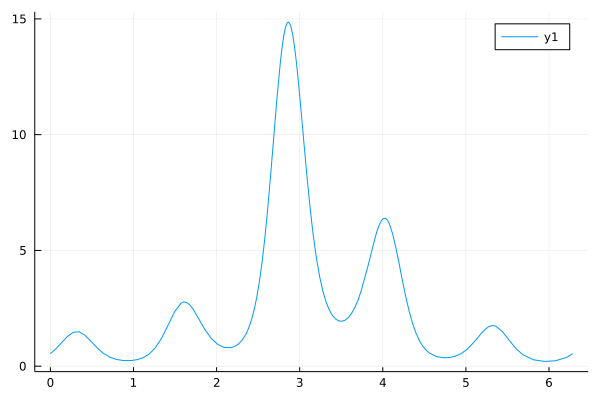

In [2]:
#f(x)の概形

f(x) = exp(sin(5x))/(1+sin(cos(x)))
plot(f,0,2π)

`ApproxFun.jl`で $f(x)$ を近似してみると、グラフは下のようになる。

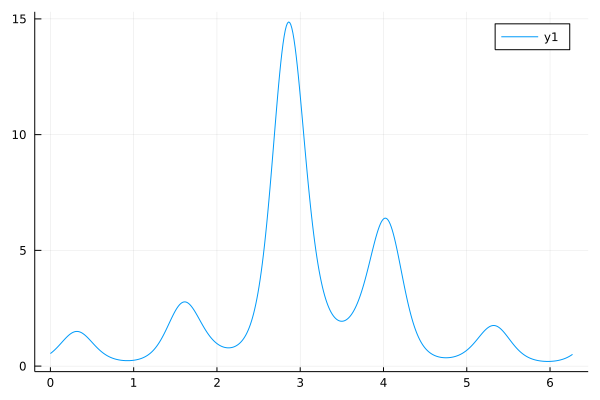

In [3]:
using ApproxFun, FFTW
fc = Fun(f,Laurent())
plot(real(fc))

フーリエ係数を比較すると

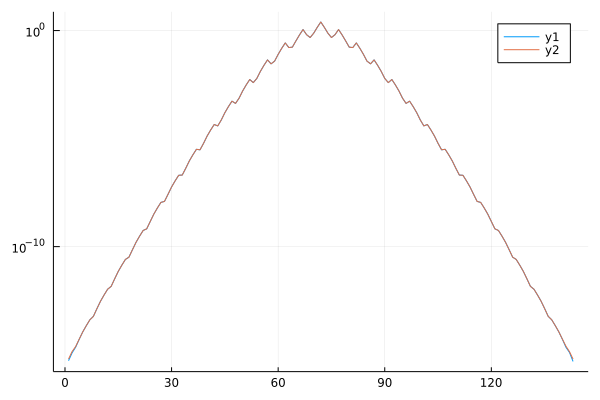

In [4]:
m = ncoefficients(fc)
M = Int((m+1)/2)
c = coefficients(fc) # coefficients of ApproxFun
function index_shift(c) # convert c -> fourier coeffs
    return [reverse(c[2:2:end]);c[1:2:end]]
end
a = fouriercoeffs(f,M)  #150を72にすると重なる。(要素数が一緒だから)
plot(abs.(a),yscale=:log10,)
plot!(abs.(index_shift(c)),yscale=:log10,)

この周期関数の2乗をする場合の畳み込みについて考えてみよう。2乗した概形は、

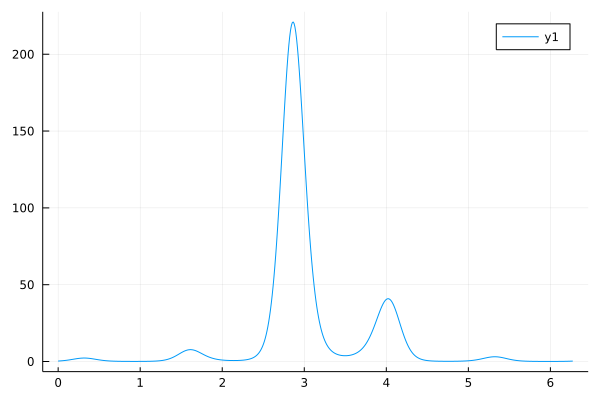

In [5]:
plot(real(fc)^2)

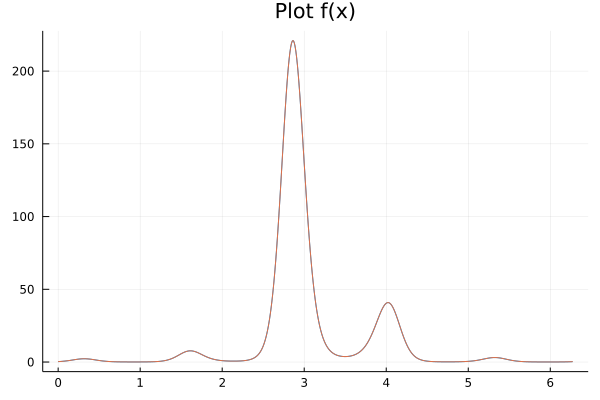

In [6]:
# FFT Algorithm
p = 2
N = (p-1)*M
ta = [zeros(N,1);a;zeros(N,1)] # 1. Padding zeros
tb = ifft(ifftshift(ta)) # 2. IFFT of ta
tbᵖ = tb.^p # 3. tb*^tb
cᵖ = fftshift(fft(tbᵖ))*(2.0*p*M-1)^(p-1) # 4. FFT of tb2 

plot_fourier!(cᵖ)

以上が離散畳み込みを実際に行った例である。次に、今行ったプログラムを、より一般化するために関数化してみよう。

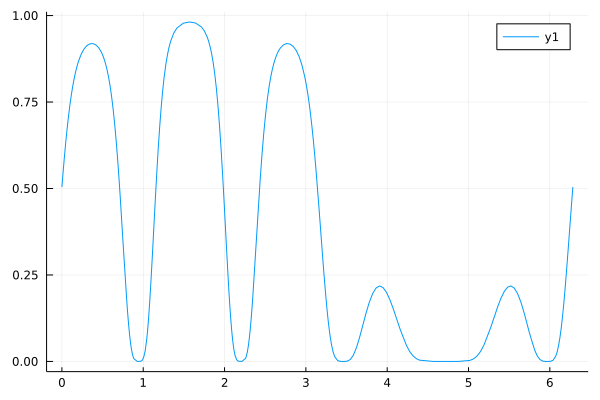

In [7]:
# f(x) = (exp(sin(5x)))^2/((1+sin(cos(x))))^2
using SpecialFunctions
f(x) = erf(sin(3x)+cos(2x))^4
plot(f , 0 , 2π)

関数が与えられたら、そのフーリエ係数を計算する`fouriercoeffs`を使って得たフーリエ係数の離散畳み込み（`powerconvfourier`）を計算することで、関数の冪乗を計算できる。

In [162]:
M = 150
p = 2
f(x) = erf(sin(3x)+cos(2x))^4
g(x) = f(x)^p
plot(g , 0 , 2π)

a = fouriercoeffs(f,M) # size(a) = 2M-1
# plot(abs.(a),yscale=:log10,)


function powerconvfourier(a::Vector{Complex{T}},p)
    M = Int((length(a)+1)/2)
    N = (p-1)*M
    ta = [zeros(N,1);a;zeros(N,1)] # 1. Padding zeros: size(ta) = 2pM-1
    tb = ifft(ifftshift(ta)) # 2. IFFT of ta
    tbᵖ = tb.^p # 3. tb*^tb
    cᵖ = fftshift(fft(tbᵖ))*(2.0*p*M-1)^(p-1)
    return cᵖ[N+1:end-N], cᵖ[p:end-(p-1)]# return (truncated, full) version
end

ap, ap_full = powerconvfourier(a,p)

plot_fourier!(ap_full)

# plot(abs.(ap),yscale=:log10,)
# plot!(abs.(ap_full),yscale=:log10,)

LoadError: UndefVarError: T not defined

### 離散畳み込みの精度保証付き数値計算
これから、離散畳み込みの精度保証を行う。離散畳み込みのアルゴリズムには、FFTが含まれるため、まず、FFTの精度保証を行うための関数を定義しよう。

In [9]:
using IntervalArithmetic:Interval

function verifyfft(z::Vector{T}, sign=1) where T
    n = length(z); col = 1; array1 = true
    if n==1
        Z = map(T,z)
        return Z
    else
        isrow_ = false
    end
    log2n = Int(round(log2(n))) #check dimension
    if 2^log2n ≠ n #2の倍数でない場合はエラー表示
        error("length must be power of 2")
    end
    #bit-reversal(ビットリバース)
    f = 2^(log2n-1)
    v = [0;f]
    for k = 1:log2n-1
#         f = 0.5*f
        f = f >> 1
        v = append!(v,f.+v)
    end
    z2 = zeros(n,col)
    if isa(real(z[1]),Interval)
        z2 = map(T,z2)
    end
    #zを入れ替え
    for j = 1: n
        z2[j,:] = z[v[j]+1,:]
    end
    #Danielson-Lanczos algorithm
    Z = complex(map(Interval,z2))
    Index = reshape([1:n*col;],n,col)
    
#     nmax=2^14
#     if n <=nmax
#         r_real = Array{Float64}(undef, 2^14, 1)
#         file = open("INTLAB_CONST.FFTDATA_R_real.bin", "r")
#         read!(file, r_real)

#         close(file)
#         r_imag = Array{Float64}(undef, 2^14, 1)
#         file = open("INTLAB_CONST.FFTDATA_R_imag.bin", "r")
#         read!(file, r_imag)
#         close(file)

#         d = Array{Float64}(undef, 14, 1)
#         file = open("INTLAB_CONST.FFTDATA_D.bin", "r")
#         read!(file, d)
#         close(file)
        
# #         c =r[1:Int(nmax/n):nmax]
#         dd = d[log2n]
        
# #         Phizero = zeros(n)
# #         Phi = complex(map(interval,Phizero))
#         Phi = (r_real[1:Int(nmax/n):nmax] .± dd) +  im * (r_imag[1:Int(nmax/n):nmax].± dd)
# #         end
#         if sign==-1
#             Phi = adjoint.(Phi)      
#         end
#     else
#     Phi = exp.(im*theta) # SLOW (INTLAB uses table)   
#     theta = @interval(pi) * sign * (0:n-1)/n; # division exact because n is power of 2
#     Phi = cos.(theta) + im*sin.(theta) # SLOW?
    theta = map(Interval,sign * (0:n-1)/n); # division exact because n is power of 2
    Phi = cospi.(theta) + im*sinpi.(theta) # SLOW?
#     end

    v = [1:2:n;]
    w = [2:2:n;]
    t = Z[w,:]
    Z[w,:]  = Z[v,:] - t
    Z[v,:]  = Z[v,:] + t
    for index　in 1: (log2n-1)    
        m = 2^index
        m2 = 2*m
        vw = reshape([1:n;],m2,Int(n/m2))
        v = vw[1: m, :]
        w = vw[m+1: m2, : ]
        indexv = reshape(Index[v[:],:],m,Int(col*n/m2))
        indexw = reshape(Index[w[:],:],m,Int(col*n/m2))
        Phi1 = repeat(Phi[1:Int(n/m):end],outer=[1,Int(col*n/m2)])
        t = Phi1 .*  Z[indexw]
        Z[indexw] = Z[indexv] - t 
        Z[indexv] = Z[indexv] + t
    end
    reverse(Z[2:end,:],dims=2)
     if sign==-1
        Z = Z/n
    end
    if isrow_
        Z = transpose(Z)　#転置
    end
    if array1
        Z = Z[:,1]
    end
    return Z
end

verifyfft (generic function with 2 methods)

In [35]:
#そもそもfouriercoeffsの中にfftがあるからそこにも区間演算が必要？
# 必要ない
M = 150
p = 2
f(x) = erf(sin(3x)+cos(2x))^4
g(x) = f(x)^p

a = fouriercoeffs(f,M) # size(a) = 2M-1
# plot(abs.(a),yscale=:log10,)

ia = map(Interval, a)

length_ia = 2M-1
length_ia_ext = nextpow(2,length_ia) #2のべき乗でないとうまくいかない
n = Int((length_ia_ext - length_ia + 1)/2) # 2n-1
ia_ext = map(Interval,im*zeros(length_ia_ext))
ia_ext[n+1:end-n+1] = ia
verifyfft(ia_ext,1)# sign = 1(fft), -1(ifft)


# function powerconvfourier(a,p) # 要変更
#     M = Int((length(a)+1)/2)
#     N = (p-1)*M
#     ta = [zeros(N,1);a;zeros(N,1)] # 1. Padding zeros: size(ta) = 2pM-1
#     tb = ifft(ifftshift(ta)) # 2. IFFT of ta
#     tbᵖ = tb.^p # 3. tb*^tb
#     cᵖ = fftshift(fft(tbᵖ))*(2.0*p*M-1)^(p-1)
#     return cᵖ[N+1:end-N], cᵖ[p:end-(p-1)]# return (truncated, full) version
# end

# iap, iap_full = powerconvfourier(ia,p)


512-element Vector{Complex{Interval{Float64}}}:
   [0.504305, 0.504306] + [-2.95573e-16, 2.87295e-16]im
 [-0.540193, -0.540192] + [-1.43479e-15, 1.37631e-15]im
   [0.574528, 0.574529] + [-1.28458e-15, 1.24097e-15]im
 [-0.607123, -0.607122] + [-2.3411e-15, 2.29521e-15]im
   [0.637836, 0.637837] + [-1.17976e-15, 1.09683e-15]im
 [-0.666586, -0.666585] + [-2.61133e-15, 2.63668e-15]im
   [0.693331, 0.693332] + [-2.04023e-15, 2.12767e-15]im
 [-0.718077, -0.718076] + [-2.89716e-15, 2.86579e-15]im
   [0.740851, 0.740852] + [-1.03387e-15, 1.03155e-15]im
 [-0.761718, -0.761717] + [-2.73315e-15, 2.61732e-15]im
   [0.780751, 0.780752] + [-2.28631e-15, 2.36232e-15]im
 [-0.798048, -0.798047] + [-3.98761e-15, 3.88575e-15]im
   [0.813706, 0.813707] + [-1.85001e-15, 1.89087e-15]im
                           ⋮
 [0.0888341, 0.0888342] + [-2.32283e-15, 2.20936e-15]im
 [-0.112885, -0.112884] + [-4.04665e-15, 4.22319e-15]im
   [0.140088, 0.140089] + [-3.43797e-15, 2.89781e-15]im
 [-0.170218, -0.170217] + [-

$$
\tilde{a}=(\underbrace{0, \cdots , 0}_{L\text{個}},\underbrace{0, \cdots , 0}_{N=(p-1)M\text{個}}, \underbrace{a_{-M+1}, \cdots , a_{M-1}}_{2M-1\text{個}},\underbrace{0, \cdots , 0}_{N\text{個}},\underbrace{0, \cdots , 0}_{L-1\text{個}}) \in \mathbb{C}^{2pM-2+2L}
$$

$$
c=(\underbrace{0, \cdots , 0}_{L\text{個}},\underbrace{0, \cdots , 0}_{(p-1)\text{個}}, \underbrace{a_{-p(M-1)}, \cdots , a_{p(M-1)}}_{2p(M-1)+1\text{個}},\underbrace{0, \cdots , 0}_{(p-1)\text{個}},\underbrace{0, \cdots , 0}_{L-1\text{個}}) \in \mathbb{C}^{2pM-2+2L}
$$

In [163]:
function powerconvfourier(a::Vector{Complex{Interval{T}}},p) where T
    M = Int((length(a)+1)/2) # length(a) = 2M-1
    N = (p-1)*M
    ia = map(Interval, a)

    length_ia = 2*p*M-1
    length_ia_ext = nextpow(2,length_ia)# 2pM-2+2L
    
    L = Int((length_ia_ext - length_ia + 1)/2)
    
    # step.1 : padding (p-1)M + L zeros for each sides
    ia_ext = map(Complex{Interval},zeros(length_ia_ext))
    ia_ext[L+N+1:end-L-N+1] = ia

    # step.2 : inverse fft
    ib_ext = verifyfft(ifftshift(ia_ext), -1) #sign = -1 : ifft
    
    # step.3 : power p elementwisely
    ib_extᵖ = ib_ext.^p
    
    # step.4 : fft with rescaling
    ic_extᵖ = fftshift(verifyfft(ib_extᵖ, 1)) * length_ia_ext^(p-1)  #sign = 1 : fft
    
#     return ic_extᵖ,ic_extᵖ
    return ic_extᵖ[L+N+1:end-N-L+1], ic_extᵖ[L+p:end-(L+p-2)] # return (truncated, full) version
end


powerconvfourier (generic function with 2 methods)

In [166]:
c,c_full = powerconvfourier(a,2);
ic,ic_full = powerconvfourier(ia,2);# 多重ディスパッチ

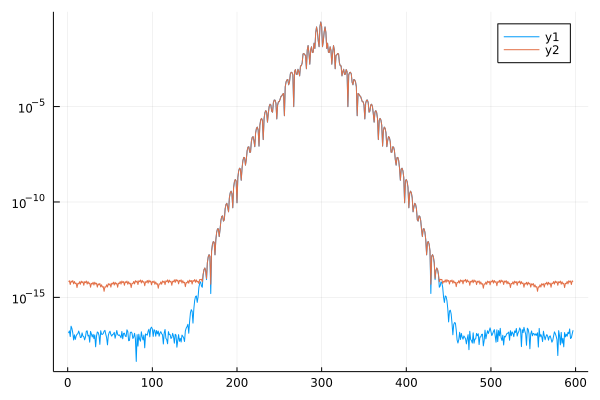

In [165]:
plot(abs.(c_full),yscale=:log10,)
plot!(mid.(abs.(ic_full)),yscale=:log10,)